# Análise de Agrupamento

## Fisioterapia 

_Importando bibliotecas_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Carregando dataset

In [2]:
from sklearn.cluster import KMeans

dfFisio = pd.read_csv('fisioterapia.csv')
dfFisio

,v1,v2,v3,v4,v5,v6
0,100.892160,69.813942,28.272501,62.241459,90.513961,58.823648
1,101.723334,44.991547,14.377189,42.157862,56.535051,25.773174
2,101.868495,44.311238,24.652878,44.644130,69.297008,11.211523
3,102.042812,51.500000,-0.261499,58.861028,58.599529,28.059697
4,102.337524,61.200000,13.469986,56.929322,70.399308,25.538429
...,...,...,...,...,...,...
295,98.672917,39.609117,22.552586,40.475232,63.027817,-0.254400
296,98.727930,63.000000,9.711318,63.924644,73.635962,26.975787
297,98.774546,32.136553,11.079047,35.311213,46.390260,6.386832
298,98.777115,52.577846,8.961262,47.602562,56.563824,50.701873


### 2. Escolhendo o número de clusters para k-Means

O primeiro passo é analisar decaimento do valor do SSE. O intervalor escolhido está entre \[2,10\] porque precisamos de mais de um grupo e 10 já são grupos demais. Podemos observar que os valores de 3 a 5 são aceitáveis pois a queda da curva deixa de ser significativa depois de 5.

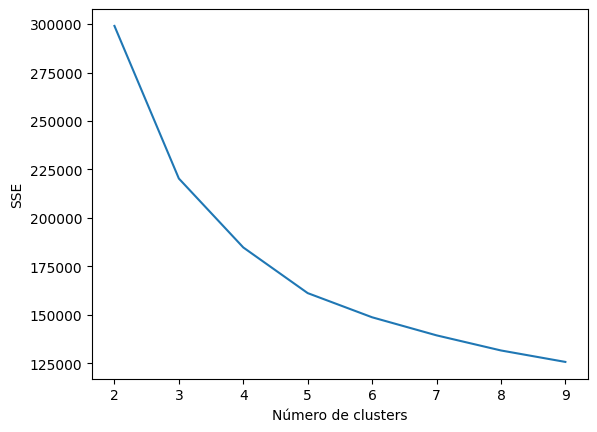

In [3]:
sse = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dfFisio)
    sse.append(kmeans.inertia_)
    
    
plt.plot(range(2, 10), sse)
plt.xticks(range(2, 10))
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.show()

Outro meio é verificar a dispersão usando o score Calinski and Harabasz, mas a curva não apresentou nenhuma informação importante. Ou seja, a curva não tem nenhum ponto máximo ou ponto mínimo, apenas a curva decrescente.

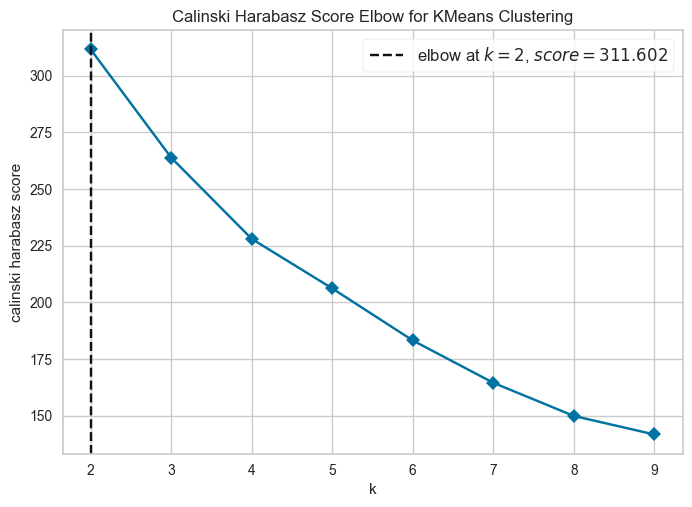

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [4]:
from yellowbrick.cluster import KElbowVisualizer

dfFisio = pd.read_csv('fisioterapia.csv')

# Inicializa o modelo e o visualizador (usando a YellowBrick)
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10), metric='calinski_harabasz', timings=False
)

visualizer.fit(dfFisio)        
visualizer.show()

A próxima analise é a mais importante para verificarmos quantos clusters o k-Means deve ter, escolhemos o intervalo de 2 a 5 para verificarmos a Silhueta. O valor escolhido será o que apresenta valores acima da média da Silhueta para todos os grupos

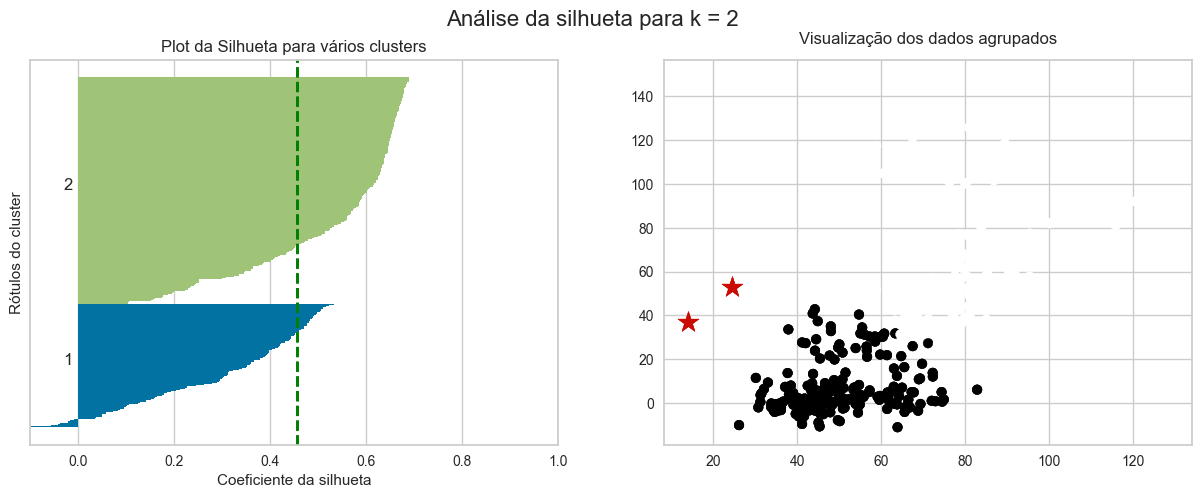

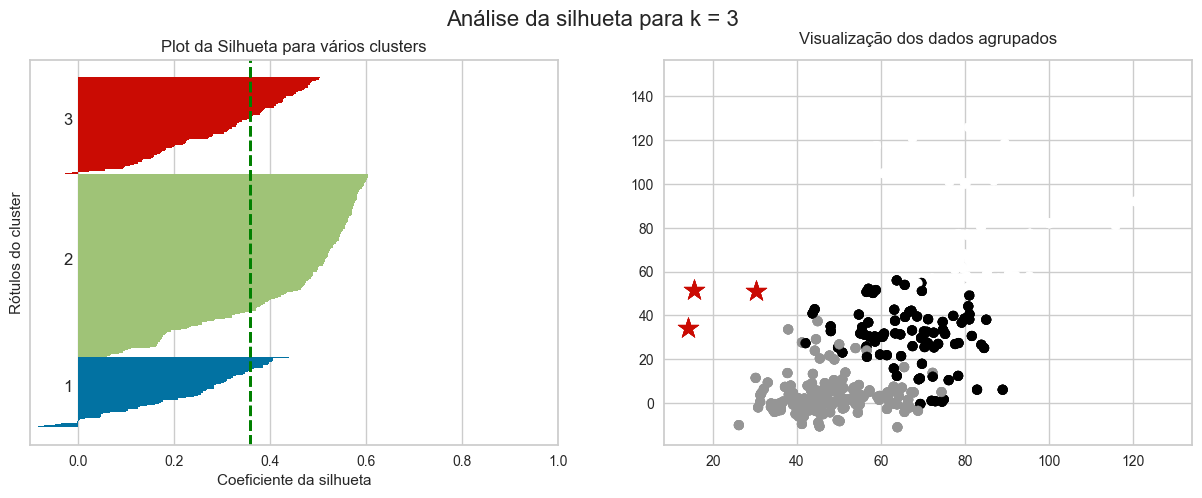

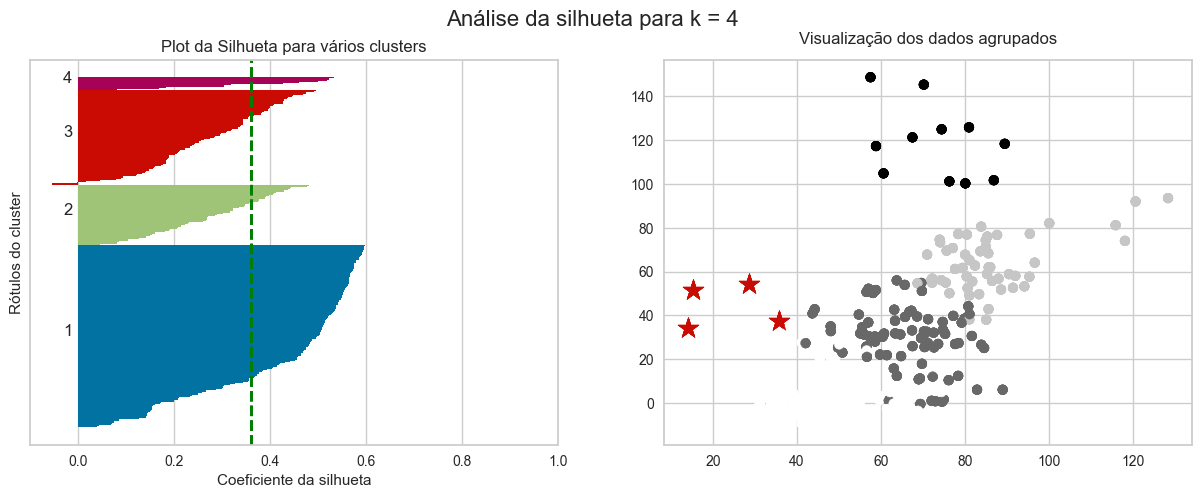

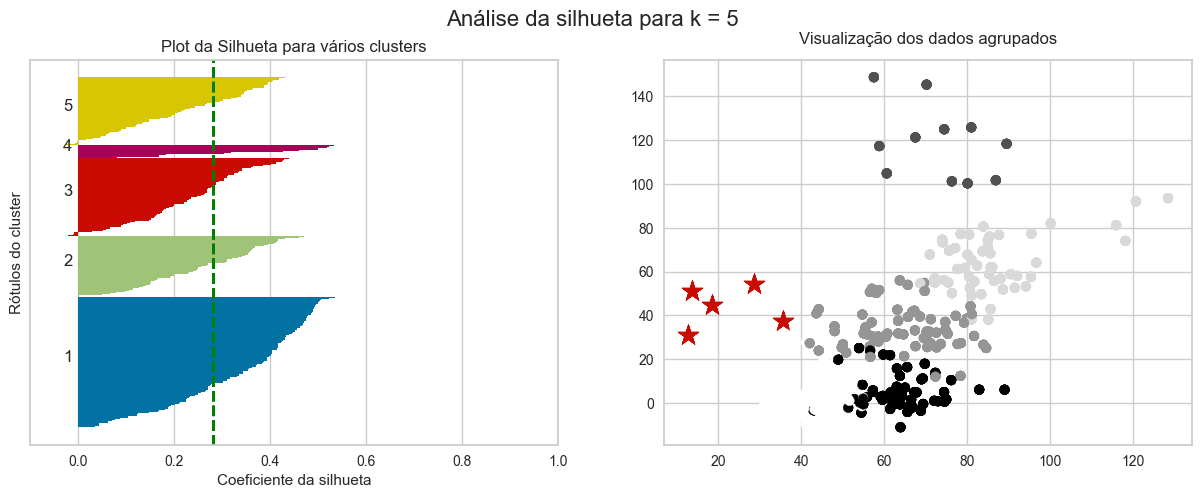

In [5]:
# Implementações para o cálculo da silhueta média e individual
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.cluster import KMeans

dfFisio = pd.read_csv('fisioterapia.csv')

# Calcular o coeficiente da silhueta 
for i,k in enumerate([2,3,4,5]):
    
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    
    # k-Means
    km = KMeans(n_clusters=k)
    y_predict = km.fit_predict(dfFisio)
    centroids  = km.cluster_centers_


    # Silhueta
    silhouette_vals = silhouette_samples(dfFisio,y_predict)
    
    # Plot da Silhueta
    y_ticks = []
    y_lower = y_upper = 0
    
    for i,cluster in enumerate(np.unique(y_predict)):
        cluster_silhouette_vals = silhouette_vals[y_predict == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)

        ax[0].barh(range(y_lower,y_upper),
        cluster_silhouette_vals,height =1);
        ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
        y_lower += len(cluster_silhouette_vals)

        # Pega o coeficiente silhueta média (de todos os pontos) 
        avg_score = np.mean(silhouette_vals)
        ax[0].axvline(avg_score,linestyle ='--', linewidth =2,color = 'green')
        ax[0].set_yticks([])
        ax[0].set_xlim([-0.1, 1])
        ax[0].set_xlabel('Coeficiente da silhueta')
        ax[0].set_ylabel('Rótulos do cluster')
        ax[0].set_title('Plot da Silhueta para vários clusters');

        # scatter plot dos dados coloridos pelos labels 
        ax[1].scatter(dfFisio['v5'],dfFisio['v6'] , c = y_predict, cmap=cm.get_cmap('viridis', 8));
        ax[1].scatter(centroids[:,2],centroids[:,3],marker = '*' , c= 'r',s =250);
        ax[1].set_title('Visualização dos dados agrupados', y=1.02)

        plt.suptitle('Análise da silhueta para k = '+str(k),fontsize=16)

Com isso pudemos verificar que se escolhermos 5 grupos temos uma boa distribuição.

### 3. Escolhendo grupos usando Agrupamento Hierárquico

In [6]:
from scipy.cluster.hierarchy import complete, ward, cophenet, linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform

dfFisio = pd.read_csv('fisioterapia.csv')
dfFisio

,v1,v2,v3,v4,v5,v6
0,100.892160,69.813942,28.272501,62.241459,90.513961,58.823648
1,101.723334,44.991547,14.377189,42.157862,56.535051,25.773174
2,101.868495,44.311238,24.652878,44.644130,69.297008,11.211523
3,102.042812,51.500000,-0.261499,58.861028,58.599529,28.059697
4,102.337524,61.200000,13.469986,56.929322,70.399308,25.538429
...,...,...,...,...,...,...
295,98.672917,39.609117,22.552586,40.475232,63.027817,-0.254400
296,98.727930,63.000000,9.711318,63.924644,73.635962,26.975787
297,98.774546,32.136553,11.079047,35.311213,46.390260,6.386832
298,98.777115,52.577846,8.961262,47.602562,56.563824,50.701873


O primeiro passo para escolher qual é a melhor métrica para o calculo da distância.

In [7]:
metricas = ['braycurtis', 
            'canberra', 
            'chebyshev',
            'cityblock',
            'correlation',
            'cosine', 
            'euclidean', 
            'hamming',
            'jaccard',
            'mahalanobis',
            'matching',
            'minkowski',
            'seuclidean',
            'sqeuclidean']
melhor_metrica = (-1, "Nenhuma")
for metrica in metricas:
    try:
        distOriginal = pdist(dfFisio, metric=metrica)

        Z = complete(pdist(dfFisio, metric=metrica))
        Cophe = cophenet(Z)

        #Correlação
        cophe = np.corrcoef(distOriginal, Cophe)[0,1]
        if not np.isnan(cophe):
            print("Coeficiente para {}: {}".format(metrica, cophe))
            if cophe > melhor_metrica[0]:
                melhor_metrica = (cophe, metrica)
        else:
            print("Nulo: {}".format(metrica))
    except:
        print("Ignorando {}...".format(metrica))
        continue
print("\n\nA melhor métrica é {}".format(melhor_metrica[1]))    

Coeficiente para braycurtis: 0.6485937982966529
Coeficiente para canberra: 0.6657300121047689
Coeficiente para chebyshev: 0.7512110781383585
Coeficiente para cityblock: 0.7125930356826403
Coeficiente para correlation: 0.7366864381600562
Coeficiente para cosine: 0.5996616437424889
Coeficiente para euclidean: 0.6409553804357295
Coeficiente para hamming: 0.8899015627397323
Coeficiente para jaccard: 0.8899015627397323
Coeficiente para mahalanobis: 0.7382602348965809
Coeficiente para matching: 0.8899015627397323
Coeficiente para minkowski: 0.6409553804357295
Coeficiente para seuclidean: 0.6322971843023333
Coeficiente para sqeuclidean: 0.5319307183731028


A melhor métrica é hamming


Escolhida a métrica, o próximo passo é escolher qual é o melhor método para calcular a distância. Dos métodos existentes (single, complete, average, weighted, centroid, median, ward) foi escolhido o centroid porque ele apresenta o diagrama de Silhueta com melhor distribuição acima da média.

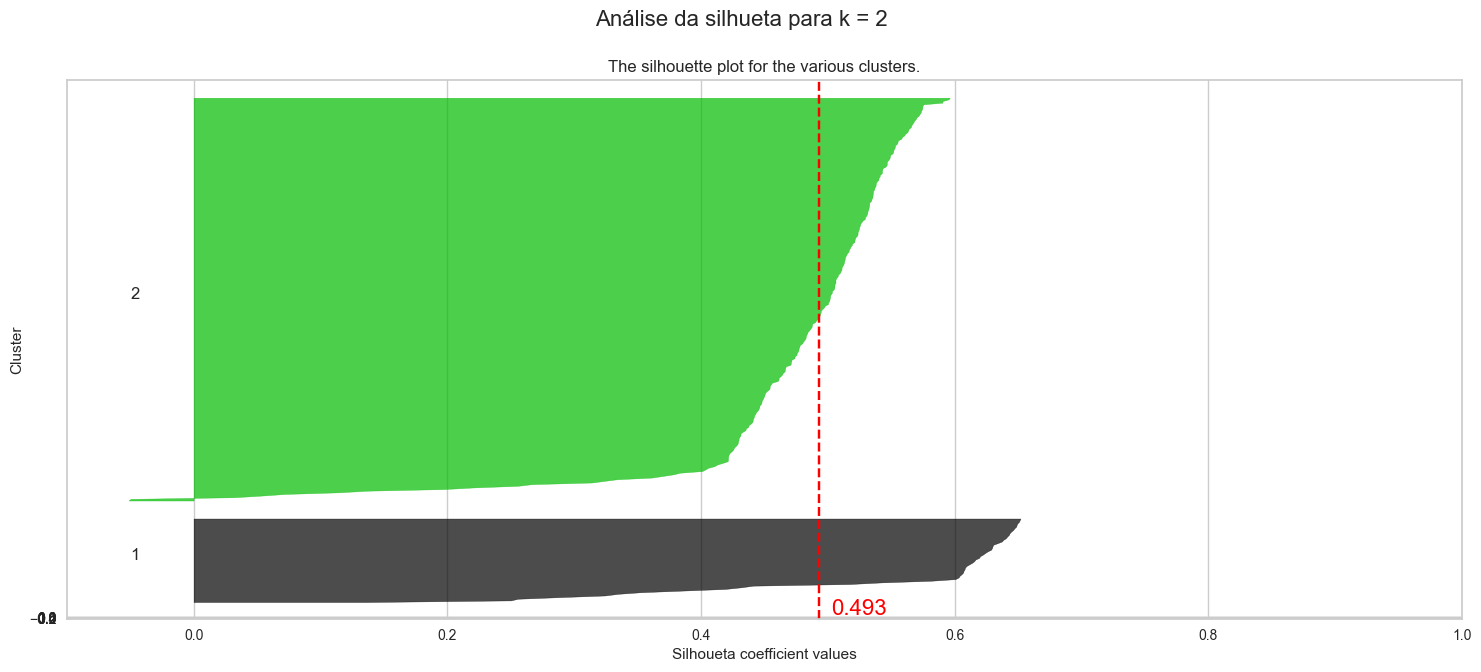

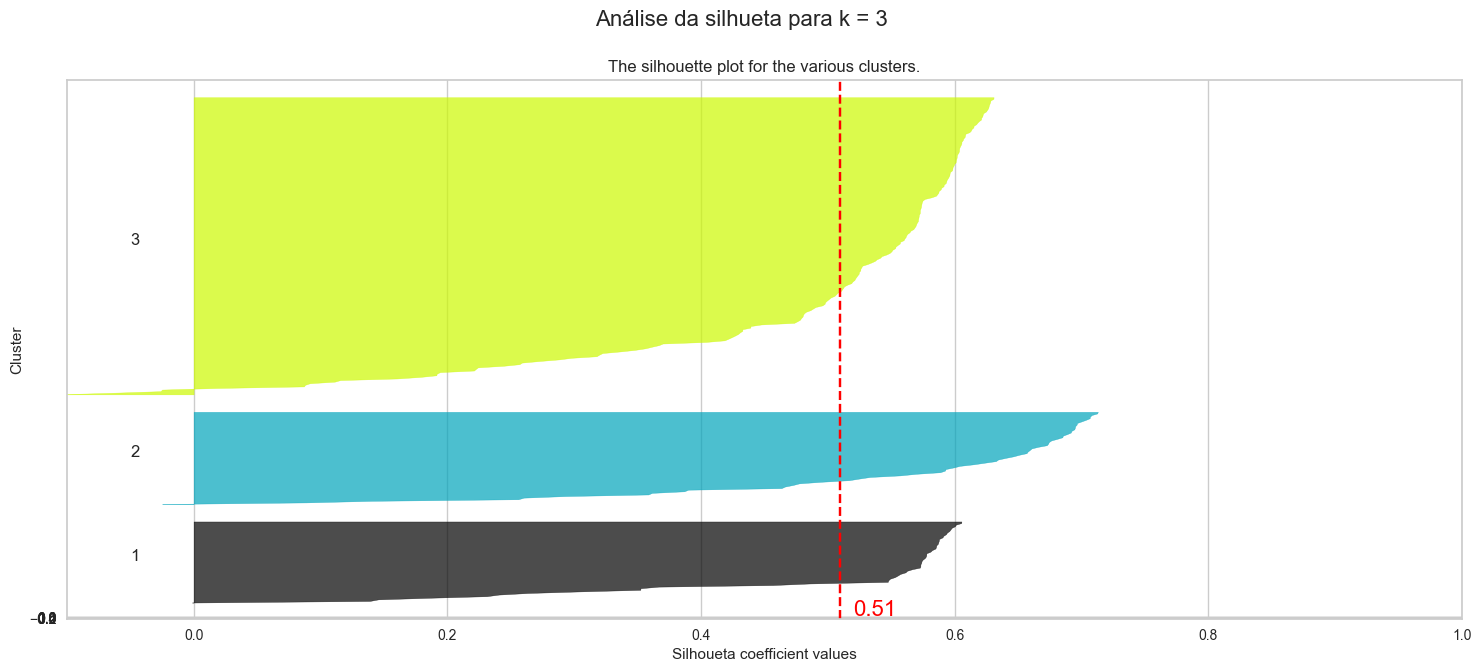

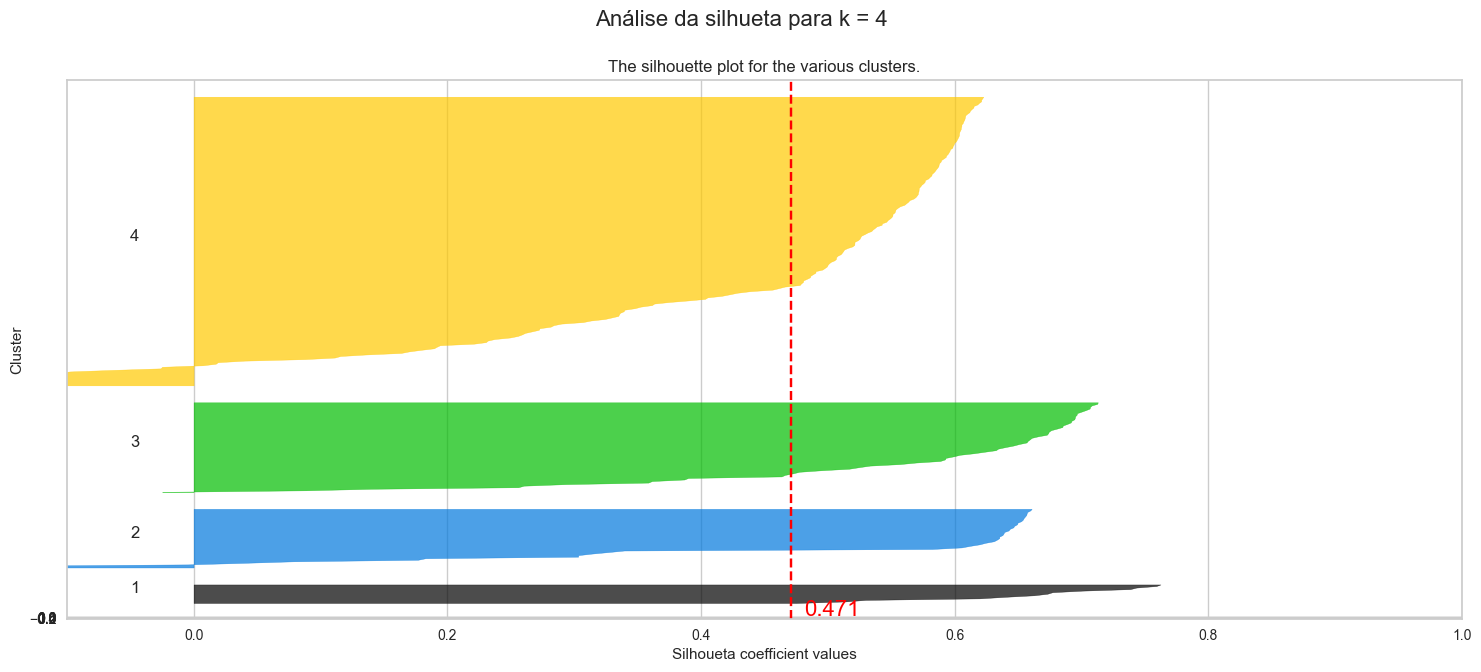

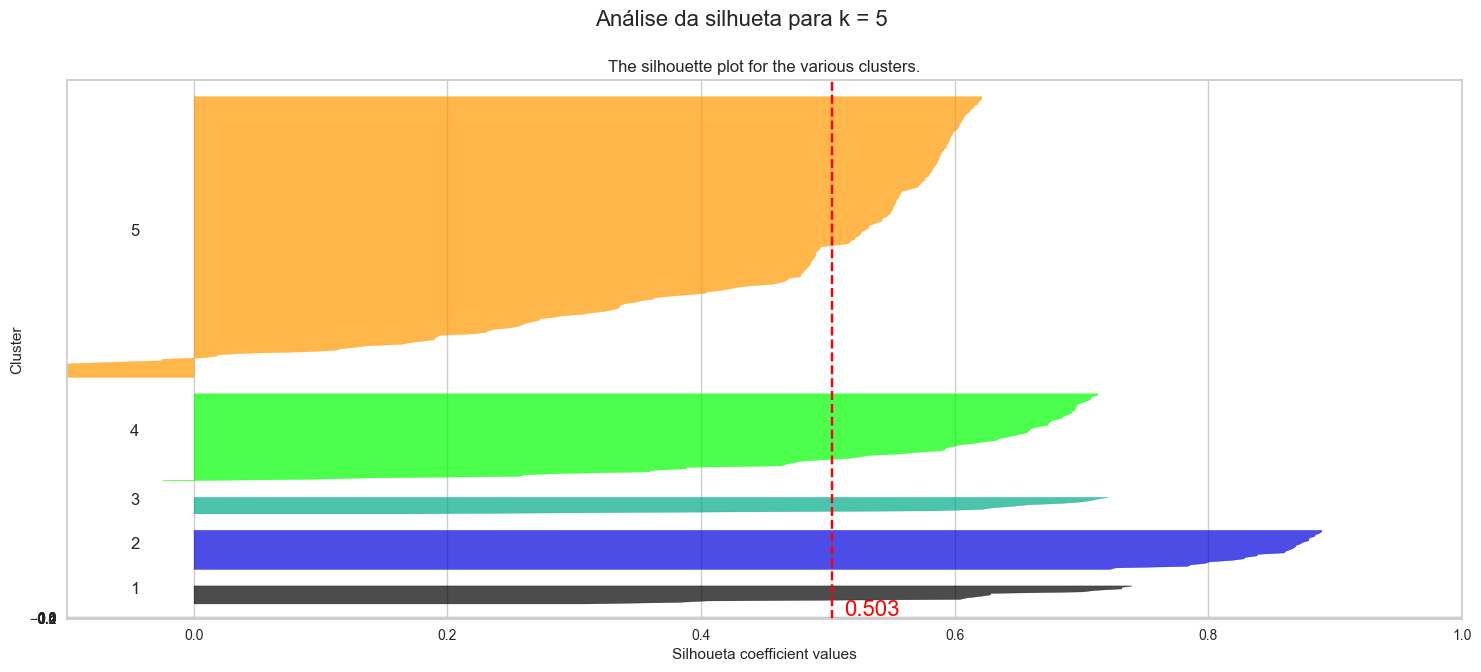

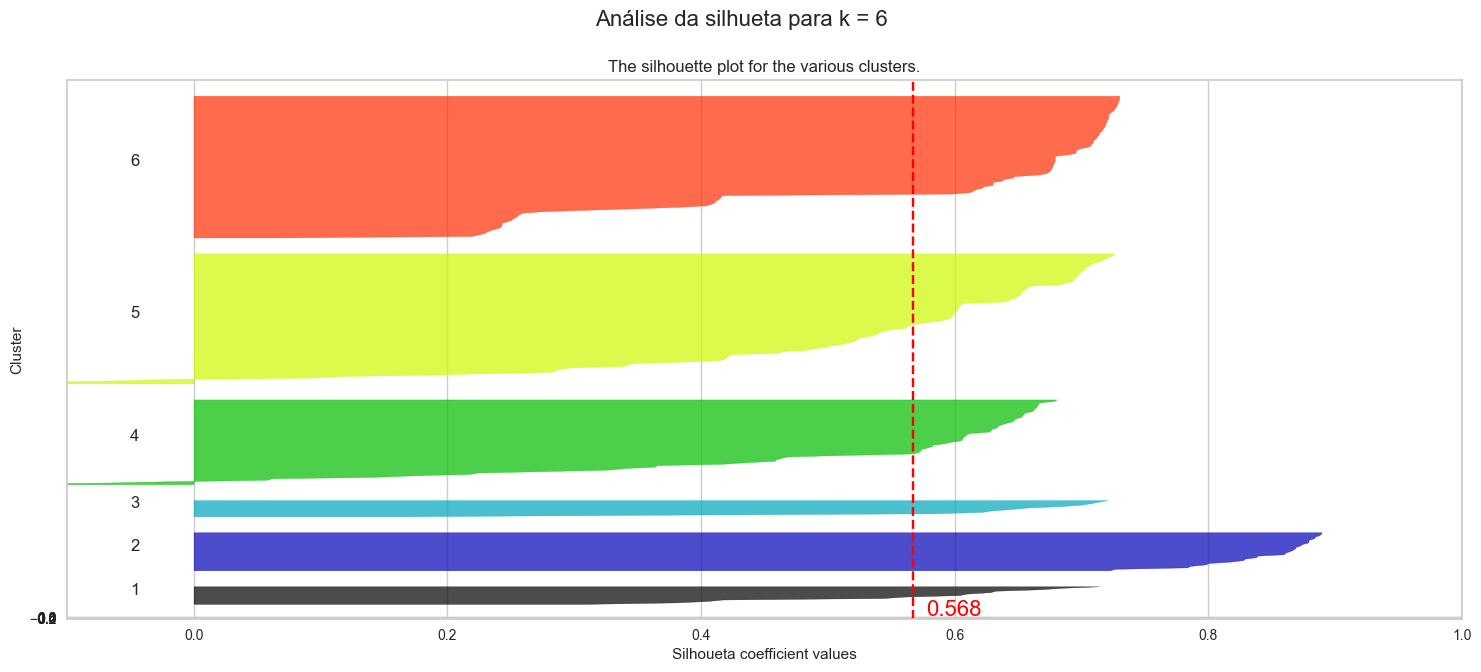

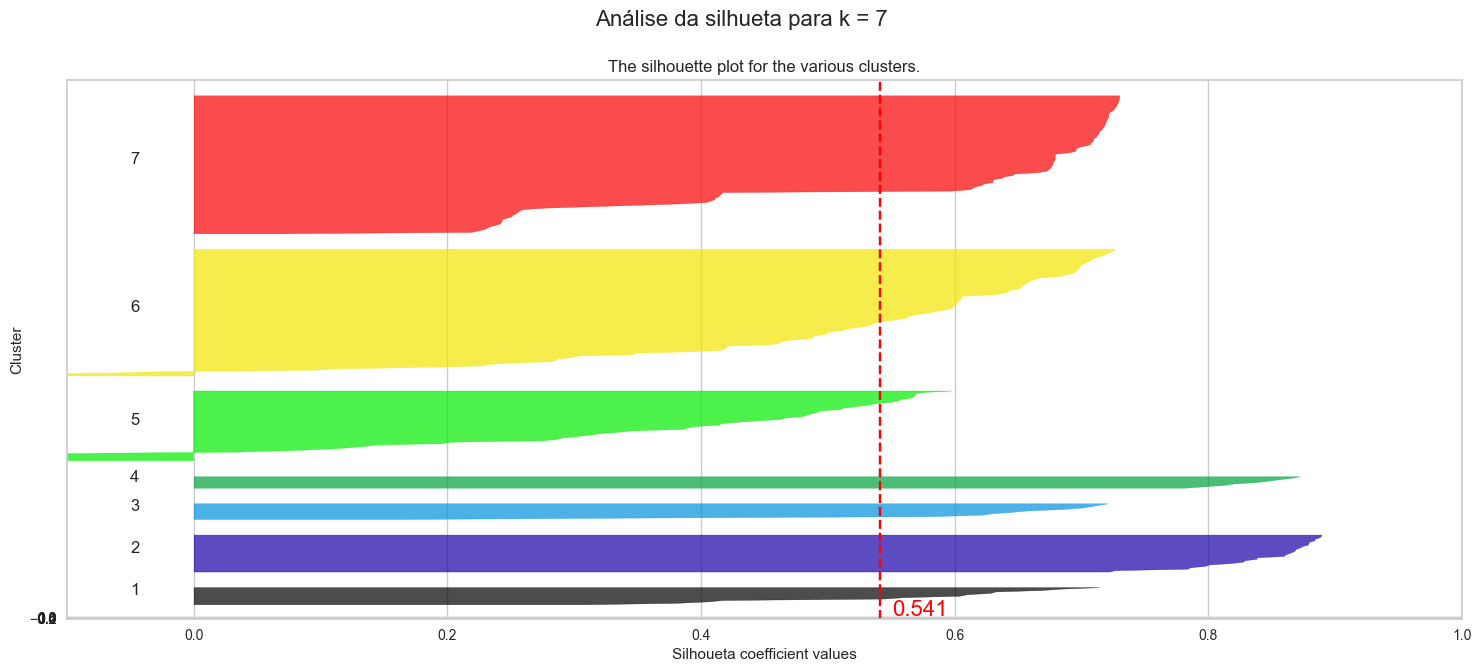

In [8]:
import matplotlib.cm as cm
no_of_clusters = [2, 3, 4, 5, 6, 7]

for no_clusters in no_of_clusters:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1,1])
    X = ward(pdist(dfFisio,metric="hamming"))    
    ax1.set_ylim([0, len(X) + (no_clusters+1)*10])
    Z = linkage(X, method='centroid')
    cluster_labels = fcluster(Z, no_clusters, criterion="maxclust")
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(no_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i + 1]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / no_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1) )
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhoueta coefficient values")
    ax1.set_ylabel("Cluster")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.text(silhouette_avg+0.01,2,np.round_(silhouette_avg, decimals=3),fontsize=16,color="red")
    ax1.set_yticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.suptitle('Análise da silhueta para k = '+str(no_clusters),fontsize=16)


Pela analise das silhuetas acima, podemos verificar que a melhor configuração são 6 clusters.

## Shopping

In [16]:
from sklearn.preprocessing import LabelEncoder #changing to numerical by label encoder

number = LabelEncoder()

dfShopping = pd.read_csv('ClientesShopping.csv')
dfShopping['Genero'] = number.fit_transform(dfShopping["Genero"].astype('str'))
dfShopping = dfShopping.drop('ID', axis=1)
dfShopping

,Genero,Idade,RendaAnual,Gastos
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
295,0,29,40,42
296,0,31,40,42
297,0,49,42,52
298,1,33,42,60


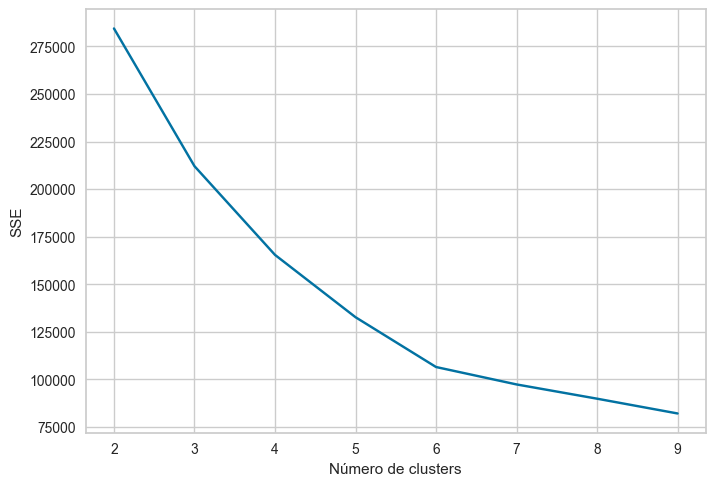

In [17]:
sse = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dfShopping)
    sse.append(kmeans.inertia_)
    
    
plt.plot(range(2, 10), sse)
plt.xticks(range(2, 10))
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.show()

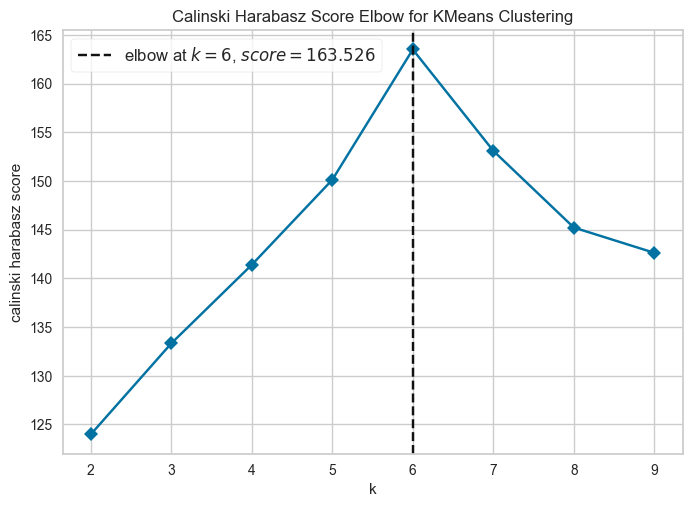

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer

# Inicializa o modelo e o visualizador (usando a YellowBrick)
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10), metric='calinski_harabasz', timings=False
)

visualizer.fit(dfShopping)        
visualizer.show()

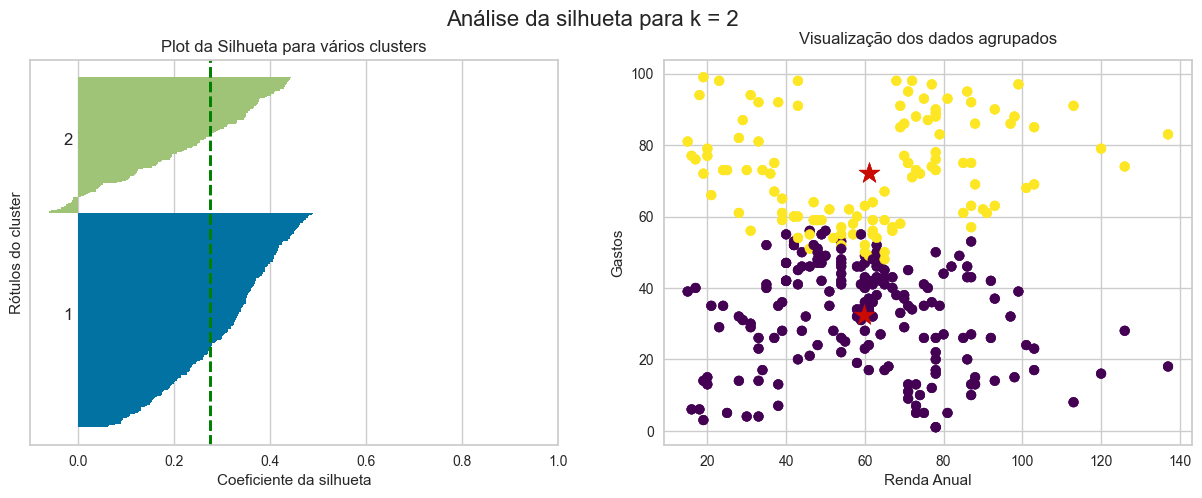

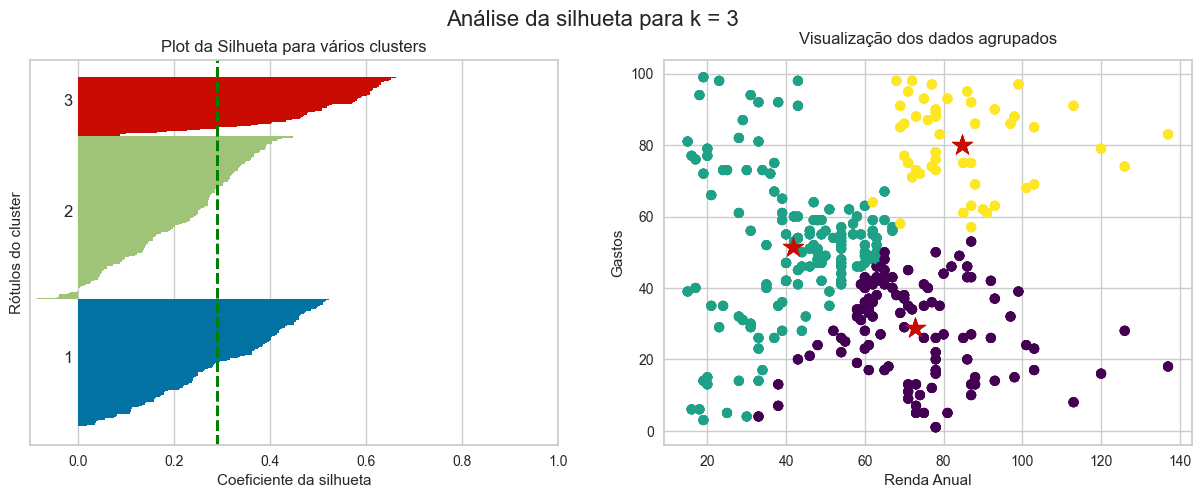

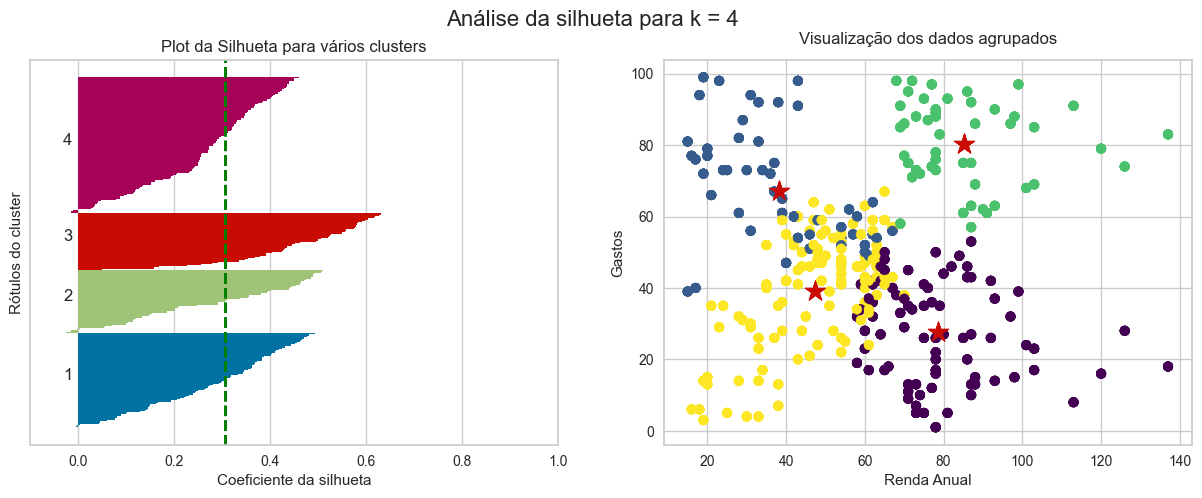

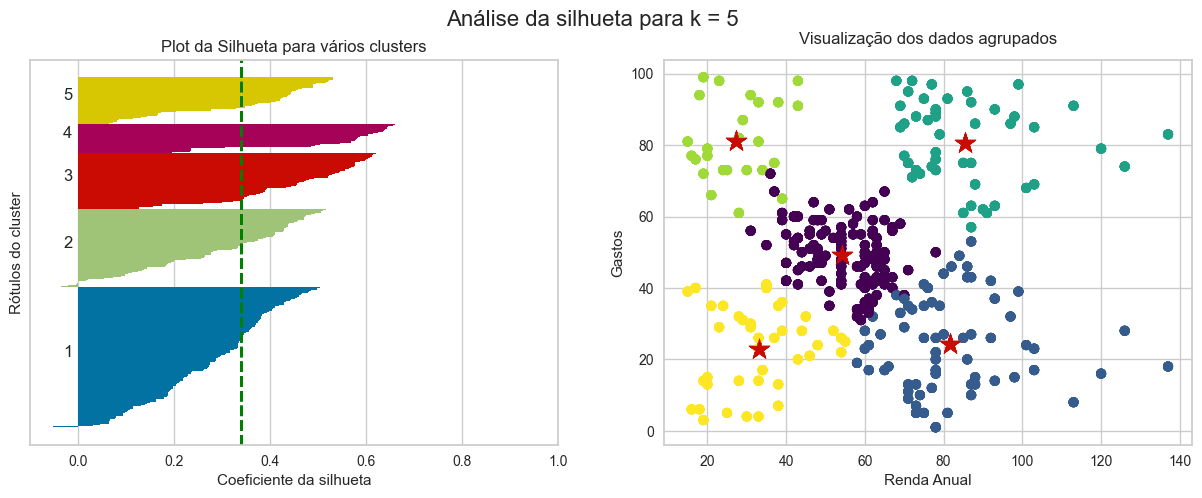

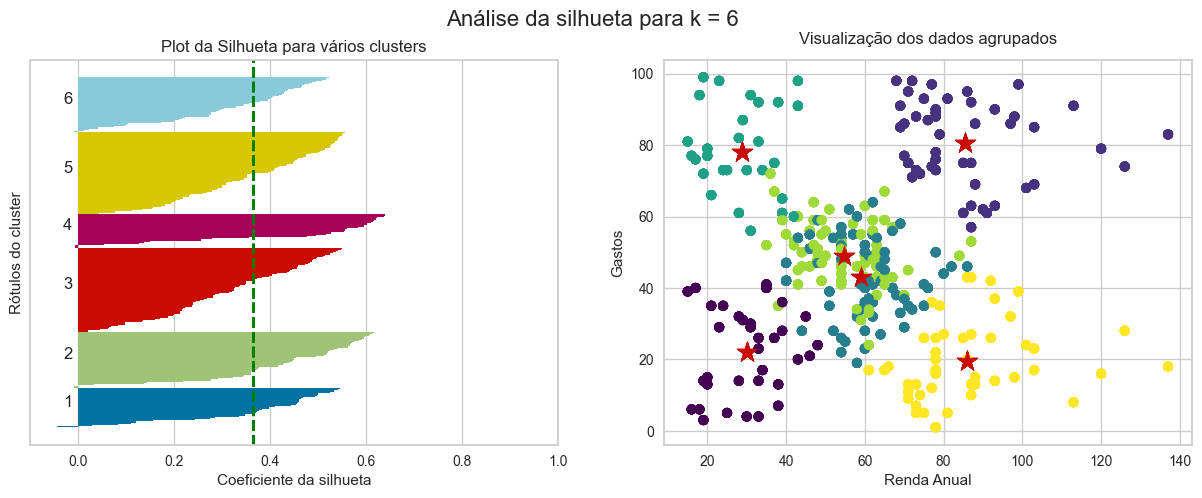

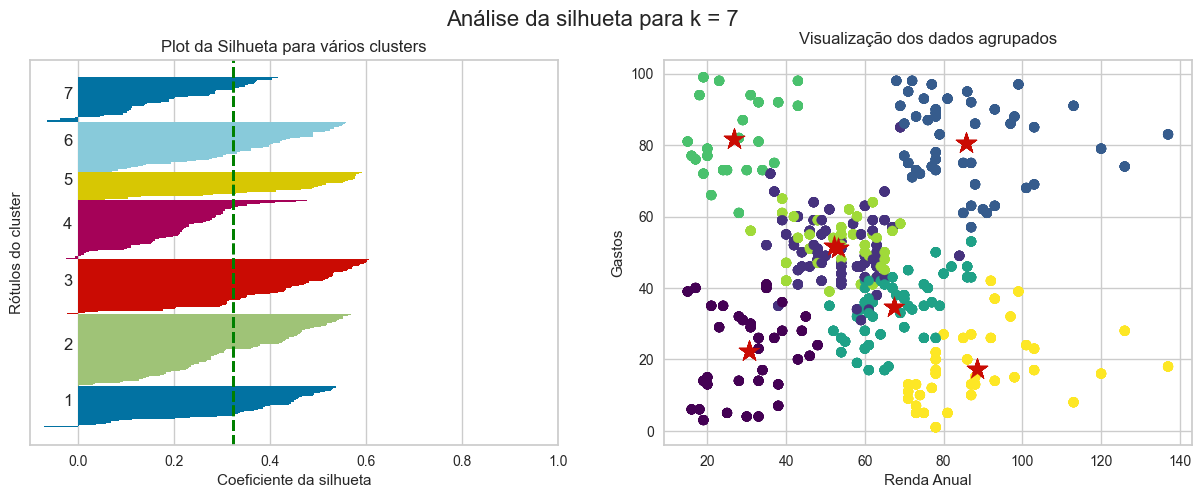

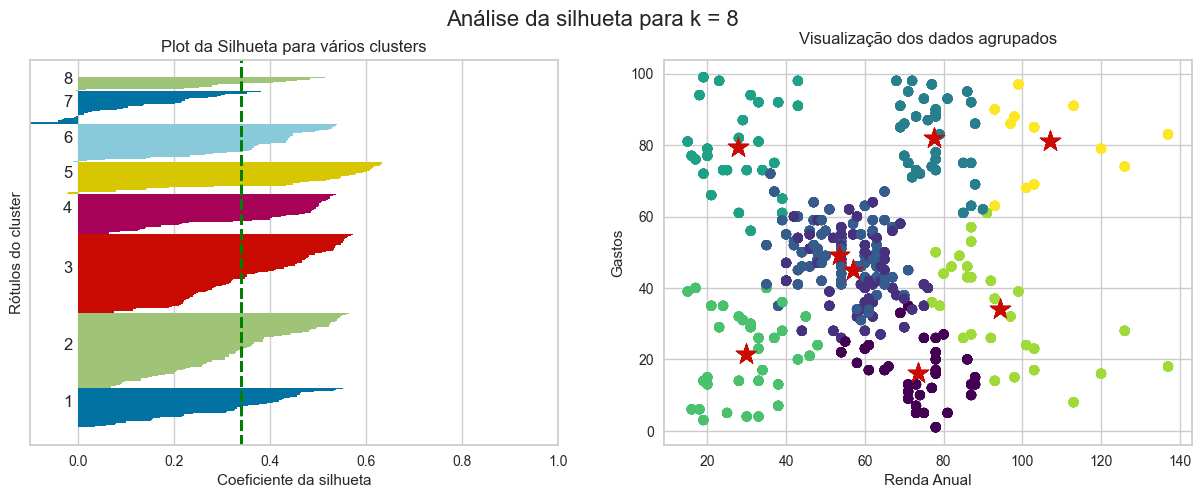

In [37]:
for i,k in enumerate([2,3,4,5, 6, 7, 8]):
    
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    
    # k-Means
    km = KMeans(n_clusters=k)
    y_predict = km.fit_predict(dfShopping)
    centroids  = km.cluster_centers_


    # Silhueta
    silhouette_vals = silhouette_samples(dfShopping, y_predict)
    
    # Plot da Silhueta
    y_ticks = []
    y_lower = y_upper = 0
    
    for i,cluster in enumerate(np.unique(y_predict)):
        cluster_silhouette_vals = silhouette_vals[y_predict == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)

        ax[0].barh(range(y_lower,y_upper),
        cluster_silhouette_vals,height =1);
        ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
        y_lower += len(cluster_silhouette_vals)

        # Pega o coeficiente silhueta média (de todos os pontos) 
        avg_score = np.mean(silhouette_vals)
        ax[0].axvline(avg_score,linestyle ='--', linewidth =2,color = 'green')
        ax[0].set_yticks([])
        ax[0].set_xlim([-0.1, 1])
        ax[0].set_xlabel('Coeficiente da silhueta')
        ax[0].set_ylabel('Rótulos do cluster')
        ax[0].set_title('Plot da Silhueta para vários clusters');

        # scatter plot dos dados coloridos pelos labels 
        ax[1].scatter(dfShopping['RendaAnual'],dfShopping['Gastos'] , c = y_predict, cmap=cm.get_cmap('viridis', 8));        
        ax[1].set_xlabel('Renda Anual')
        ax[1].set_ylabel('Gastos')
        ax[1].scatter(centroids[:,2],centroids[:,3],marker = '*' , c= 'r',s =250);
        ax[1].set_title('Visualização dos dados agrupados', y=1.02)

        plt.suptitle('Análise da silhueta para k = '+str(k),fontsize=16)

In [35]:
metricas = ['braycurtis', 
            'canberra', 
            'chebyshev',
            'cityblock',
            'correlation',
            'cosine', 
            'euclidean', 
            'hamming',
            'jaccard',
            'mahalanobis',
            'matching',
            'minkowski',
            'seuclidean',
            'sqeuclidean']
melhor_metrica = (-1, "Nenhuma")
for metrica in metricas:
    try:
        distOriginal = pdist(dfShopping, metric=metrica)

        Z = complete(pdist(dfShopping, metric=metrica))
        Cophe = cophenet(Z)

        #Correlação
        cophe = np.corrcoef(distOriginal, Cophe)[0,1]
        if not np.isnan(cophe):
            print("Coeficiente para {}: {}".format(metrica, cophe))
            if cophe > melhor_metrica[0]:
                melhor_metrica = (cophe, metrica)
        else:
            print("Nulo: {}".format(metrica))
    except:
        print("Ignorando {}...".format(metrica))
        continue
print("\n\nA melhor métrica é {}".format(melhor_metrica[1]))  

Coeficiente para braycurtis: 0.5551683724643065
Coeficiente para canberra: 0.848625858725479
Coeficiente para chebyshev: 0.5644948870609304
Coeficiente para cityblock: 0.5511856671316008
Coeficiente para correlation: 0.5021341616818654
Coeficiente para cosine: 0.45645923096404584
Coeficiente para euclidean: 0.4637026497826169
Coeficiente para hamming: 0.9118311013410462
Coeficiente para jaccard: 0.6479297316777471
Coeficiente para mahalanobis: 0.4763307716186366
Coeficiente para matching: 0.9118311013410462
Coeficiente para minkowski: 0.4637026497826169
Coeficiente para seuclidean: 0.5628471373500716
Coeficiente para sqeuclidean: 0.3596434799522161


A melhor métrica é hamming


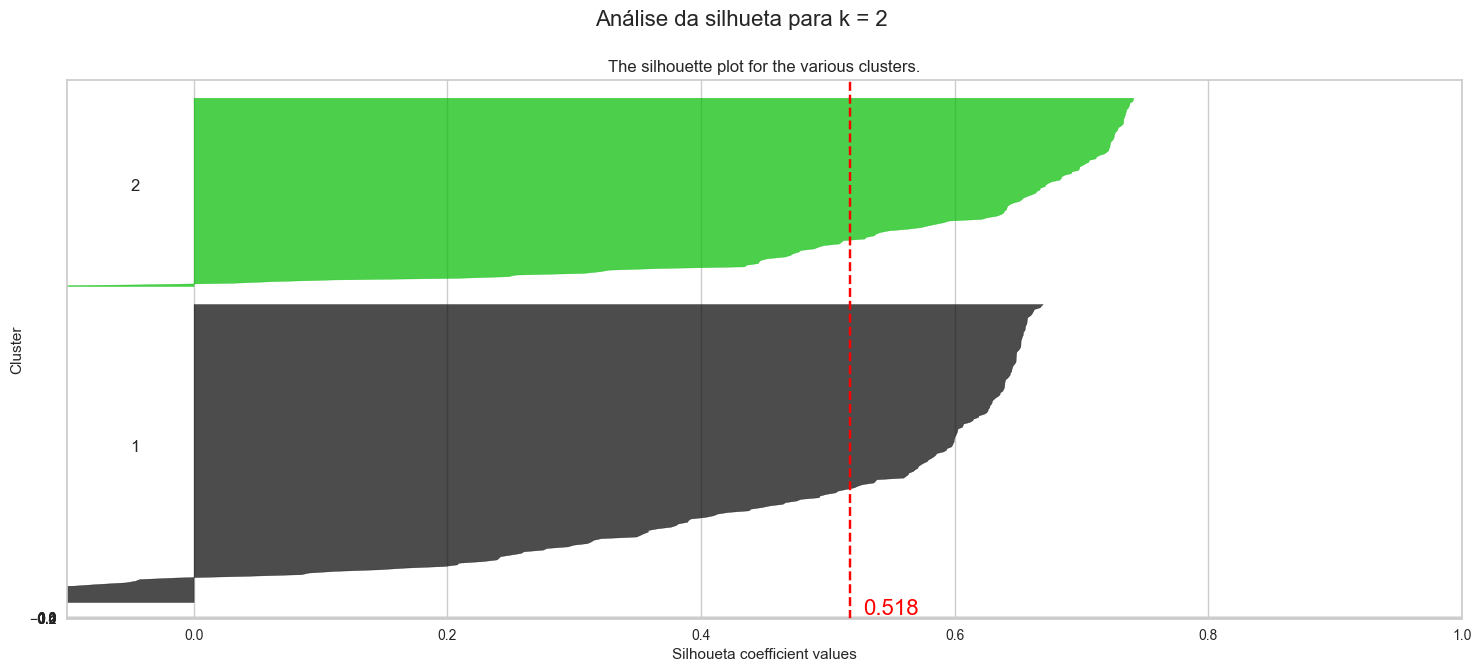

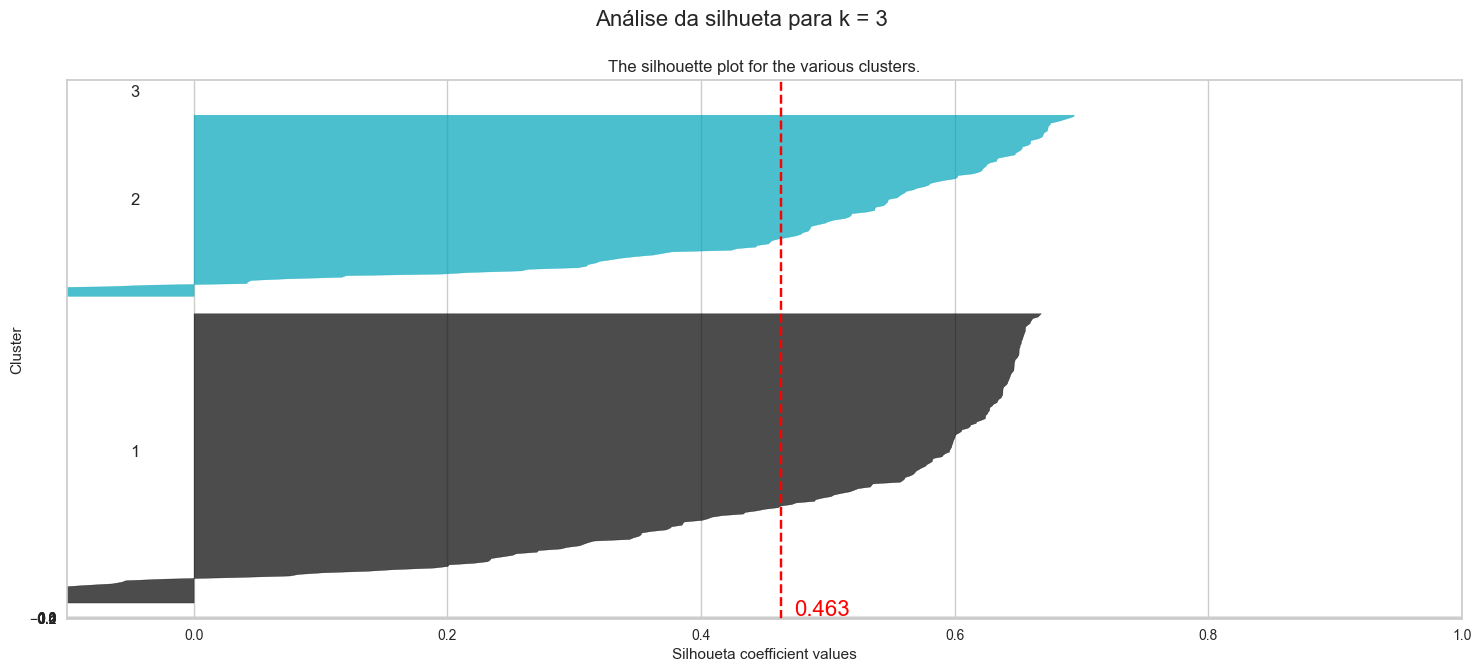

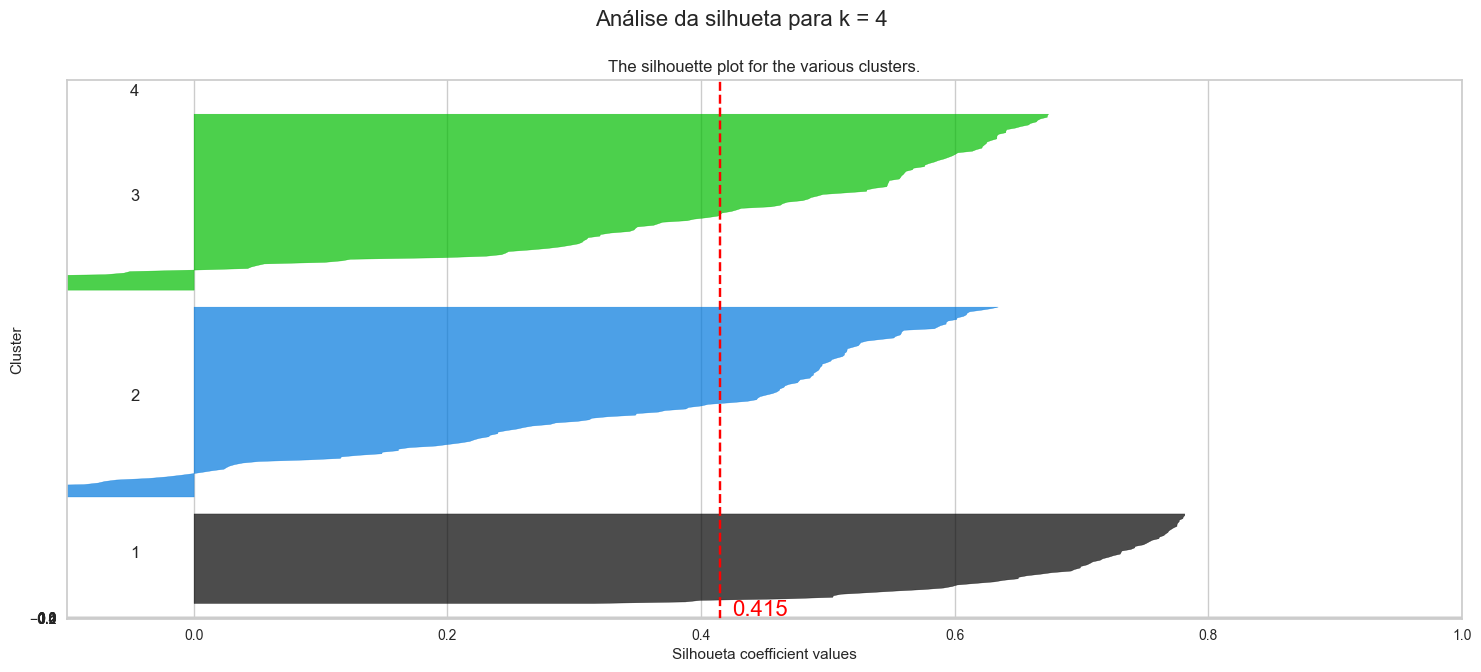

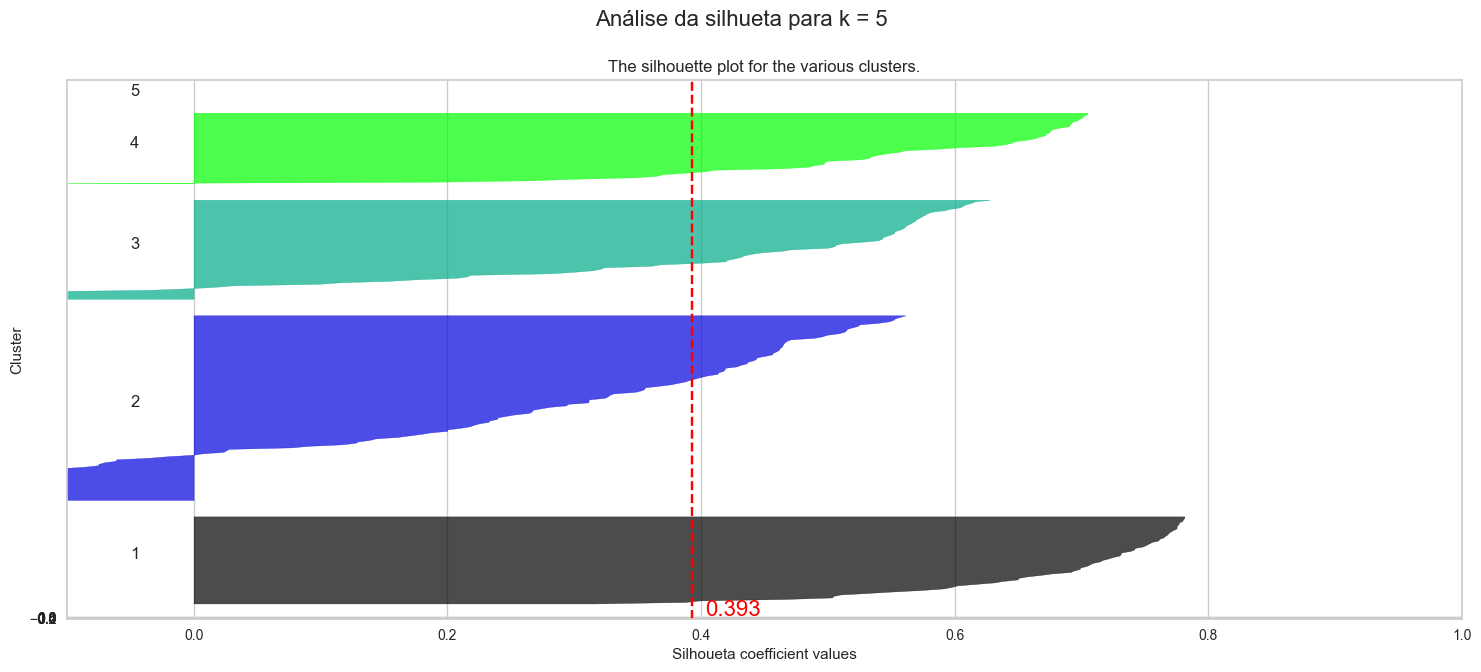

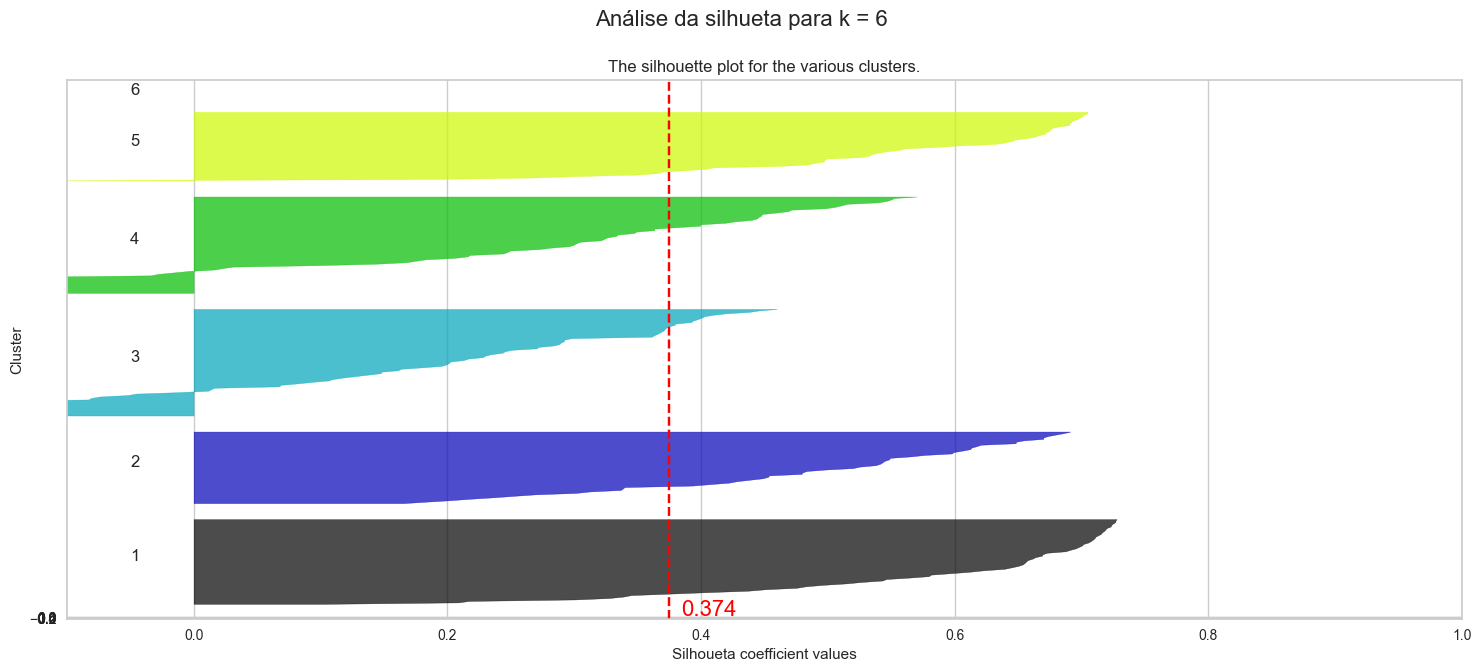

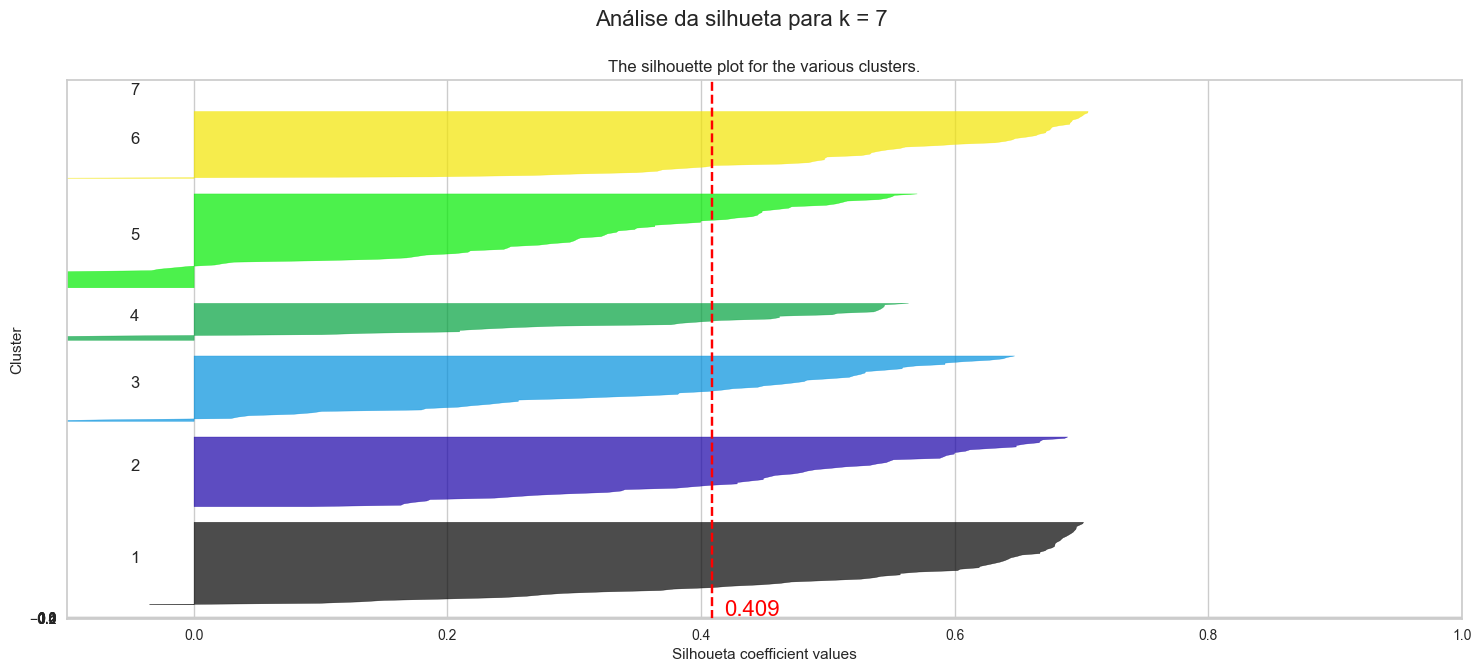

In [36]:
import matplotlib.cm as cm
no_of_clusters = [2, 3, 4, 5, 6, 7]

for no_clusters in no_of_clusters:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1,1])
    X = ward(pdist(dfShopping,metric="hamming"))    
    ax1.set_ylim([0, len(X) + (no_clusters+1)*10])
    Z = linkage(X, method='centroid')
    cluster_labels = fcluster(Z, no_clusters, criterion="maxclust")
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(no_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i + 1]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / no_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1) )
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhoueta coefficient values")
    ax1.set_ylabel("Cluster")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.text(silhouette_avg+0.01,2,np.round_(silhouette_avg, decimals=3),fontsize=16,color="red")
    ax1.set_yticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.suptitle('Análise da silhueta para k = '+str(no_clusters),fontsize=16)
